In [1]:
# importing libraries
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
digits = load_digits()


In [2]:
digits.data.shape

(1797, 64)

In [3]:
# Create array using numpy
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
A

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

Singular Value Decomposition is a matrix factorization technique that decomposes a matrix A into three matrices: U, Σ, and V, where A = UΣV^T.     

Here, U and V are orthogonal matrices and Σ is a diagonal matrix with non-negative real numbers on its diagonal. The diagonal elements of Σ are called the singular values of A.

In [11]:
# Next, we compute the SVD of matrix A using the numpy.linalg.svd function.
U, S, VT = np.linalg.svd(A, full_matrices=False)

In [12]:
# let us extract diagonal elements 
Sdiag=np.diag(S)

In [13]:
#Reconstructring orginal matrix
A_reconstructed = np.dot(U, np.dot(Sdiag, VT))
print(A_reconstructed)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


# Lets us take an example of image

In [18]:
!pip install gdown


[notice] A new release of pip available: 22.3 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 62.8/62.8 kB 565.4 kB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 96.7/96.7 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 140.9/140.9 kB 4.1 MB/s eta 0:00:00
     -------------------------------------- 155.3/155.3 kB 4.7 MB/s eta 0:00:00


In [19]:
import gdown
from pathlib import Path

gdown.download("https://doc.google.com/a/fusemachines.com/uc?id=1OjhRuFeFyFHz972QXdUxhYTXGhfIFssj", "fox.jpg")

image_file = Path("fox.jpg")

Downloading...
From: https://doc.google.com/a/fusemachines.com/uc?id=1OjhRuFeFyFHz972QXdUxhYTXGhfIFssj
To: D:\AIMLDL\Machine Learning\Module 8 - Dimensionality Reduction\fox.jpg
100%|███████████████████████████████████████████████████████████████████████████████| 140k/140k [00:00<00:00, 1.06MB/s]


In [16]:
# Importing libraries
import matplotlib.pyplot as plt
# Set figure size
plt.rcParams['figure.figsize']=[14,6]

In [21]:
# Loading image

from PIL import Image

img = Image.open(image_file)

# Convert image to grayscale
X = img.convert('L') 

np.array(X).shape

(640, 960)

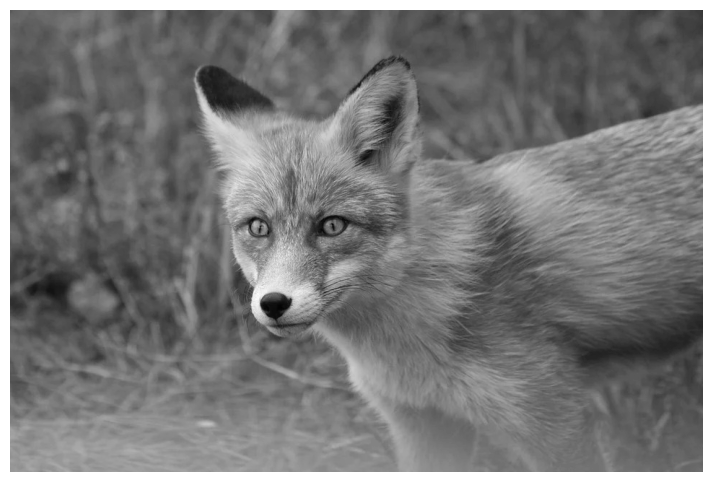

In [22]:
# plotting image
img=plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

##### So, this is the image. Now, we will decompose the image matrix using Singular Value Decomposition (SVD). Then, we will extract the singular values from Σ

In [25]:
U, S, VT = np.linalg.svd(X, full_matrices=False)

In [27]:
# let us extract diagonal elements 
diag_element=np.diag(S)
diag_element

array([[8.67666222e+04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.02442009e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.43077438e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.29381118e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.25909063e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.19349024e+00]])

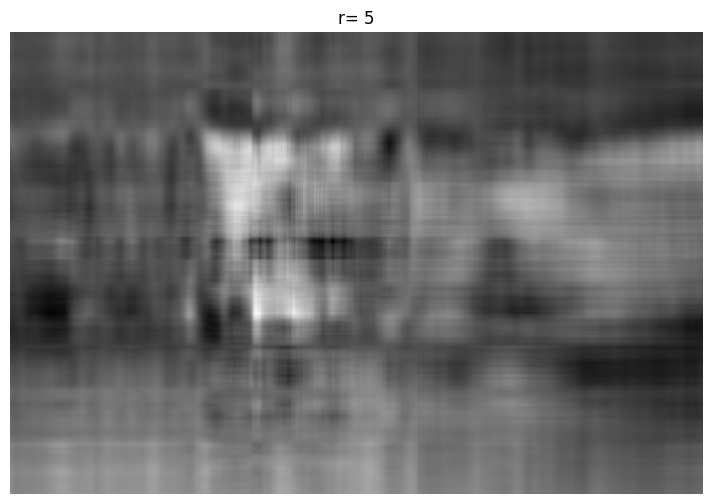

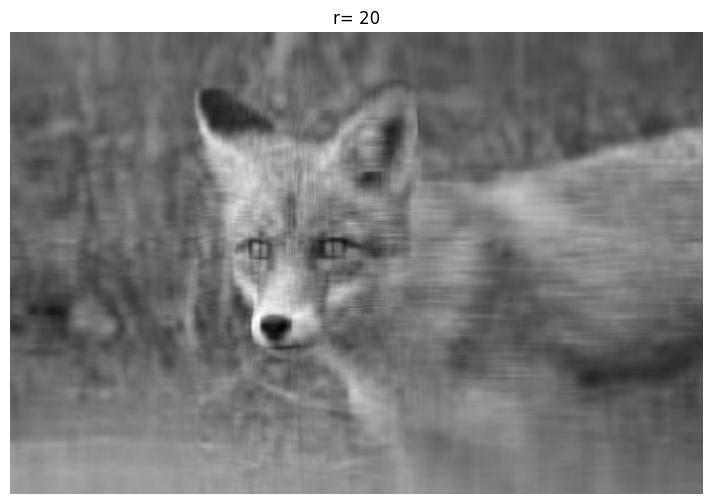

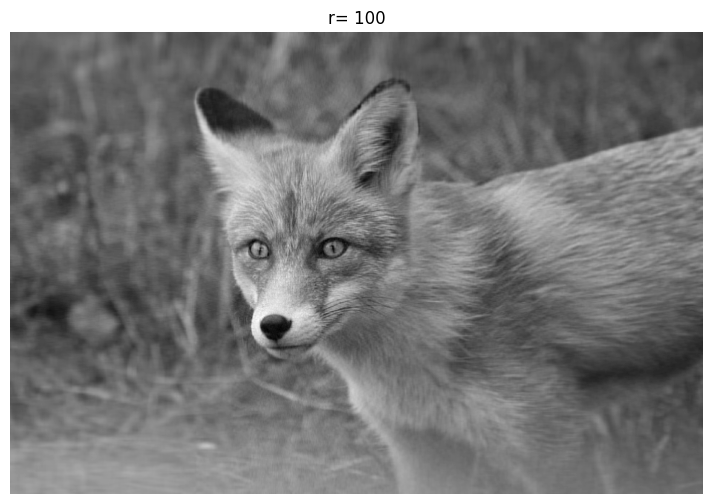

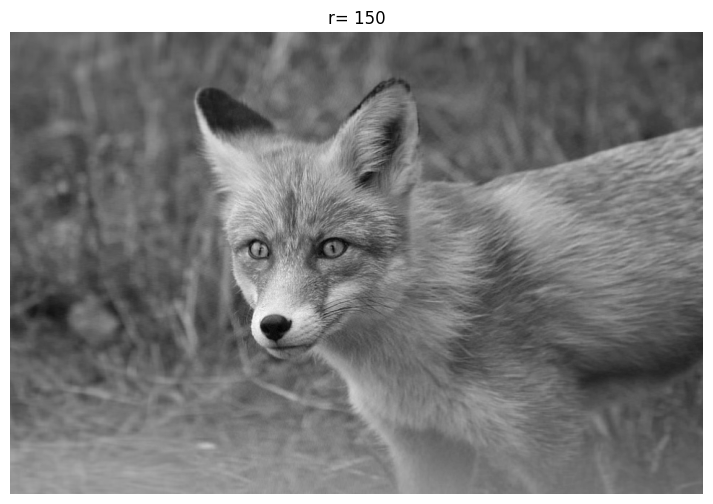

In [32]:
#function for reconstruction of matrix/image using 'r' components.
def reconstructing_matrix(U,S,VT,r):
    Xapp = np.dot(U[:,:r], np.dot(S[0:r,:r], VT[:r,:]))
    return Xapp

for j,r in enumerate((5,20,100, 150)):
    #approximating by taking select top few singular values
    Xapp = reconstructing_matrix(U,diag_element,VT,r)
    plt.figure(j+1)
    img = plt.imshow(Xapp)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title(f'r= {str(r)}')
    plt.show()

Lastly, we will see how the amount of singular values or rank is related to the information recovered.

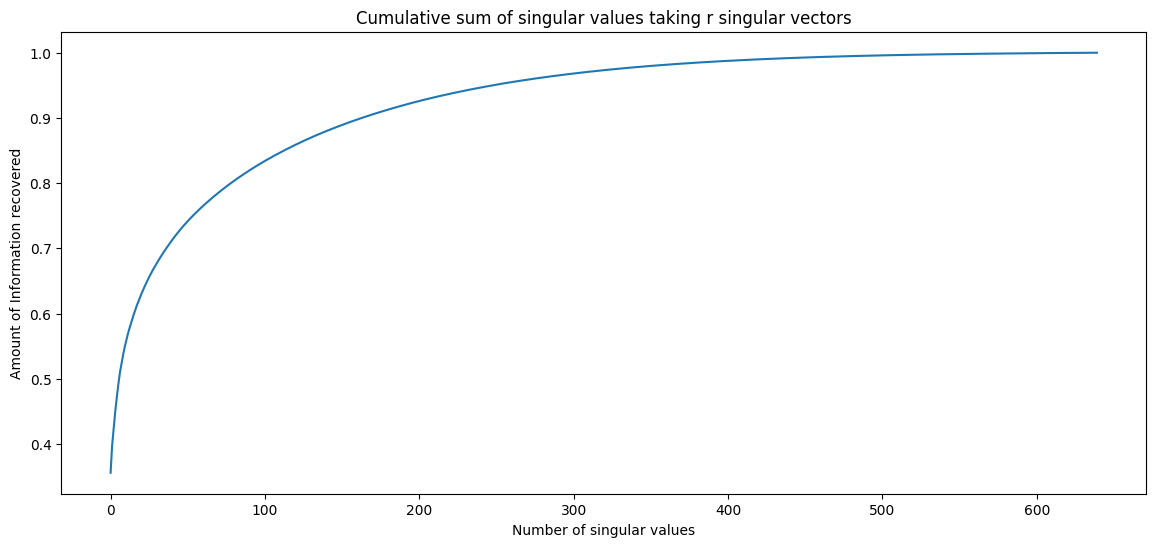

In [33]:
plt.figure(2)
plt.plot(np.cumsum(np.diag(diag_element))/np.sum(np.diag(diag_element)))
plt.title('Cumulative sum of singular values taking r singular vectors')
plt.xlabel('Number of singular values')
plt.ylabel('Amount of Information recovered')
plt.show()